# Лабораторная работа №3 (Методы спуска)
---
### Работу выполнили:
Обиджанов Алишер<br>
Кузнецов Павел<br>
Казаков Андрей<br>

[*Сслыка на репозиторий*](https://github.com/Iamnotagenius/Primat)

---
### Градиентный спуск с постоянным шагом:
**Теория:**

$F(x_1, x_2, \dots, x_n) \rightarrow min$

Если функция $F$ диффернцируется, то задачу на минимум можно решать с помощью градиентных методов.

$\nabla F(x) =
\left(
    \begin{matrix}
    \frac{\partial F}{\partial x_1}\\
    \frac{\partial F}{\partial x_2}\\
    \dots\\
    \frac{\partial F}{\partial x_n}
    \end{matrix}
\right)$

$x^0=
\left(
    \begin{matrix}
    x^0_1\\
    \dots\\
    x^0_n
    \end{matrix}
\right) \qquad x^1= x^0-\nabla \alpha F(x^0) \qquad x^i=x^{i-1}-\nabla \alpha F(x^{i-1})$

$\alpha$ - скорость спуска, $\alpha > 0$ (Чем меньше $\alpha$, тем точнее шаг)

Для того, что бы найти шаг:

$\nabla F(x^1(\alpha)) \rightarrow \underset{\alpha}{min}$

$\alpha = arg\space\underset{\alpha}{min} \nabla F(x'(\alpha))$

**Реализуем пример в коде:**

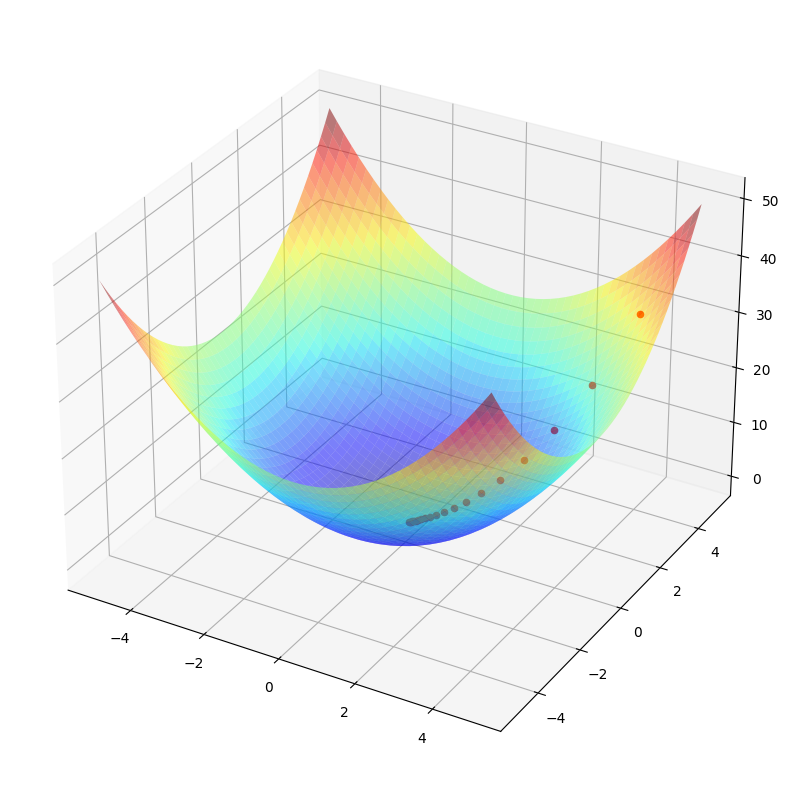

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def derivative_x(f, x, y, h=0.0001):
    return (f(x+h, y) - f(x-h, y)) / (2*h)

def derivative_y(f, x, y, h=0.0001):
    return (f(x, y+h) - f(x, y-h)) / (2*h)

def grad(f, x, y, h=0.0001):
    return np.array([derivative_x(f, x, y, h), derivative_y(f,x, y, h)])

# определим функцию градиентного спуска
def gradient_descent(f, start_point, step_size, num_iterations):
    history = [start_point]
    point = np.array(start_point)
    for i in range(num_iterations):
        point = point - step_size * grad(f, *point)
        history.append(point)

    history = np.array(history)
    # построим график
    x = np.linspace(-5, 5, 50)
    y = np.linspace(-5, 5, 50)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='jet', alpha=0.5)
    for i in range(num_iterations):
        ax.scatter(*history[i], f(*history[i]), color='r')
    plt.show()

# зададим начальную точку и скорость спуска
start_point = [4, 4]
step_size = 0.1
num_iterations = 20

# выполним градиентный спуск
gradient_descent(lambda x, y: x**2 + y**2, start_point, step_size, num_iterations)

### Градиентный спуск с дроблением шага и условием Армихо:

Рассматривается функция
$$\phi_k(\alpha):=f(x_k+ad_k)$$
Заметим, что
$$\phi_k(\alpha)=\nabla f(x_k+\alpha d_k)^T d_k$$
Поскольку d_k является направлением спуска, то $\phi'(0)=\nabla f(x_k)^T d_k <0$

**Условием Армихо** для $\alpha$ называется выполнение следующего неравенства:
$$\phi_k(\alpha) \le \phi_k(0) + c_1\alpha\phi'_k(0)$$
где $c_1 \in (0, 0.5)$ - некоторая константа

**Реализуем пример в коде:**

Iteration 1, x = 0.0, y = 0.0, f(x,y) = 0.0


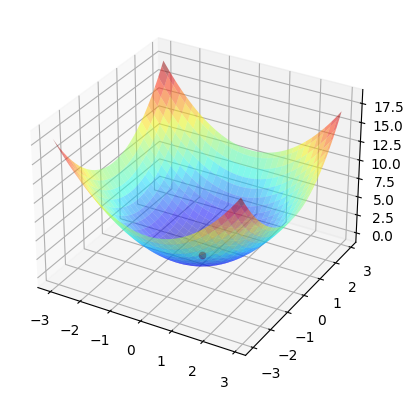

In [57]:
# начальные значения
x0 = np.array([3, 2])
alpha = 1
beta = 0.5
eps = 1e-5
iters = 0
max_iters = 100

# создание графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.1)
X, Y = np.meshgrid(x, y)
zs = np.array([f(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z, cmap='jet', alpha=0.5)

# обновление весов
while iters < max_iters:
    g = grad(f, *x0)
    step = alpha
    while f(*(x0 - step*g)) > f(*x0) + beta*step*np.dot(g, -g):
        step *= 0.5
    x1 = x0 - step*g
    if np.linalg.norm(x0-x1) < eps:
        break
    x0 = x1
    iters += 1
    print("Iteration {}, x = {}, y = {}, f(x,y) = {}".format(iters, *x0, f(*x0)))
    ax.scatter(*x0, f(*x0), color='r')
plt.show()

### Метод наискорейшего спуска:

В этом случае мы из точки $x^{[k]}$ будем двигаться в направлении антиградиента до тех пор пока не достигнем минимума функции f на этом направлении, т.е. на луче
$$L={x=x^{[k]}-\lambda f'(x^{[k]});\quad\lambda \le 0}$$
$$\lambda^{[k]}=arg\space\underset{\lambda\in[0,\infty)}{min} f(x^{[K]}-\lambda f'(x^{[k]}))$$

**Реализуем пример в коде:**

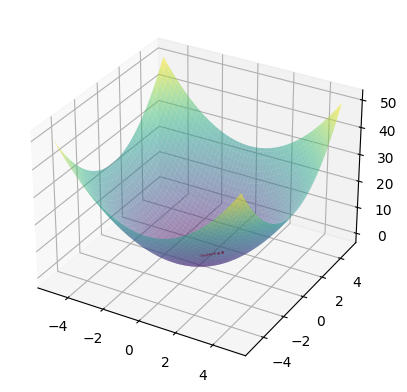

In [58]:

# строим график функции
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
z_grid = f(x_grid, y_grid)
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', alpha=0.5)

# начальное приближение и параметры град. спуска
x0 = np.array([1, 1])
alpha = 0.1
tol = 1e-6
max_iter = 100

# запускаем град. спуск
x = x0
i = 0
while i < max_iter:
    # вычисляем градиент
    g = grad(f, *x)
    # вычисляем шаг
    step = -alpha*g
    # обновляем значения
    x_new = x + step
    if np.linalg.norm(x_new - x) < tol:
        break
    x = x_new
    i += 1
    # отображаем на графике
    plt.scatter(*x, f(*x), color='red')

# отображаем график
plt.show()

### Метод сопряженных градиентов

$$F(x)\rightarrow min, x\in R^n$$

$F(x)$ - неприрывно дифференцируемая в $R^n$ функция. Что бы модифицировать метод сопряжённых градиентов для этой задачи необходимо получить для $p_k,\alpha_k, \beta_k$ формулы, в которые не входит мтарица А:

$$\alpha = arg\underset{\alpha_k}F(x_{k-1}+\alpha_k p_k)$$
$$p_{k+1}=-F'(x_k)+\beta_k p_k$$

1. $\beta_k = -\frac{\langle F'(x_k),F'(x_k) \rangle}{\langle F'(x_{k-1}),F(x_{k-1}) \rangle}$ - Метод Флетчера - Ривса

2. $\beta_k = \frac{\langle F'(x_k),F'(x_k) - F'(x_{k-1}) \rangle}{\langle F'(x_{k-1}),F(x_{k-1}) \rangle}$ - Метод Полака-Райберга

3. $\beta_k = \frac{\langle F''(x_k)p_k,F'(x_k) \rangle}{\langle F''(x_{k-1})p_k,p_k \rangle}$

Если функция $F(x)$ - квадратичная и строго выпуклая, то все три формулы дают одинаковый результат. Если $F(x)$ - произвольная функция, то каждой из формул соответствует своя модификация методта сопряжённых градиентов. Третья формула используется редко, так как она требует, что бы функция $F(x)\in C^2(R^n)$ и вычисления гессиана  функции $F(x)$ на каждом шаге метода

**Реализуем пример в коде:**

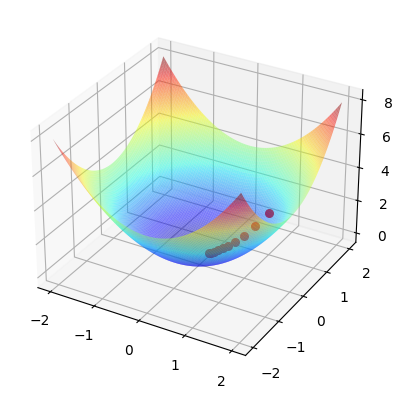

In [59]:
def f(x, y):
    return x**2 + y**2

def beta_k(grad_prev, grad_cur):
    return np.dot(grad_cur, grad_cur - grad_prev) / np.dot(grad_prev, grad_prev)

def descent(f, start, iterations=100, eps = 1e-6):
    x = start
    path_x, path_y, path_f = [start[0]], [start[1]], [f(*start)]

    g = grad(f, *start)
    d = -g

    for i in range(iterations):
        alpha = -np.dot(d,g)/np.dot(d, d)
        x = x + alpha*d
        prev_grad = g
        g = grad(f, *x)

        beta = beta_k(prev_grad, g)

        d = -g + beta * d

        path_x.append(x[0])
        path_y.append(x[1])
        path_f.append(f(*x))

        if np.linalg.norm(g) < eps:
            print(f"Converged in {i} iterations")
            break

    x_arr = np.linspace(-2, 2, 100)
    y_arr = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x_arr, y_arr)
    Z = f(X, Y)

    plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 10))
    plt.plot(path_x, path_y, '-o')

    plt.show()

descent(f, np.array([1, 1]))